In [21]:
import pandas as pd
df=pd.read_csv('/content/gender_submission.csv')
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [22]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [23]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [24]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
import numpy as np

In [26]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print("Training samples:",x_train.shape)
print("Testing samples:",x_test.shape)

Training samples: (334, 1)
Testing samples: (84, 1)


In [28]:
from sklearn.svm import SVC


In [29]:
svm_linear = SVC(kernel='rbf',class_weight='balanced',C=10)


In [30]:
svm_linear.fit(x_train, y_train)# gives relation b/w x and y

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, class_weight='balanced')

In [31]:
y_pred=svm_linear.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score ,precision_score,f1_score,recall_score

In [33]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.4880952380952381


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Confusion Matrix:")
print("TP FP")
print("FN TN")
print(cm)

Confusion Matrix:
TP FP
FN TN
[[19 15]
 [28 22]]


In [35]:
precision = precision_score(y_test,y_pred, zero_division=0)
print("Precision:",precision)

Precision: 0.40425531914893614


In [36]:
recall = recall_score(y_test,y_pred, zero_division=0)
print("Recall:",recall)

Recall: 0.5588235294117647


In [37]:
f1=f1_score(y_test,y_pred, zero_division=0)
print("F1 Score:",f1)

F1 Score: 0.4691358024691358


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
cm=confusion_matrix(y_test,y_pred,labels=[1,0])

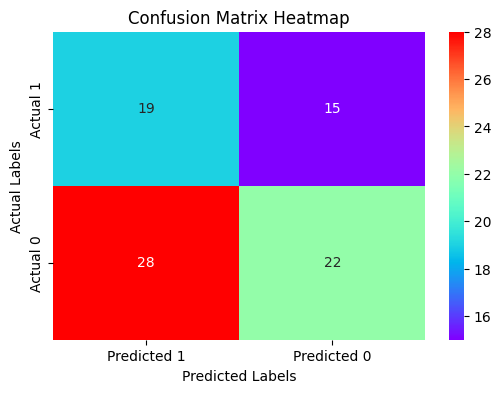

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow',
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()